# **Asking meaningful questions**

**Student**: Pham Le Tu Nhi  
**Student ID**: 21120308

## 1. Questions preview

##### <center>**What is the state of Data Science in countries around the world?**</center>
This is a big question to pose (it's very macro and multi-facet), and at first posing the question I didn't know what I was asking specifically. There are 2 part in the quesions that need specification: `state of DS` and `in the world`. 

The first part `state of DS`, after much thinking, I've come to conlcude that I want to know the scale and how Data Science is value in each country, along with what the field Data Science is being apply to most in that country.

The second part `in the world` refer to how I would compare countries in the world. The survey is most likely not inclusive of all cases, though I would believe it's a good approximation. Therefore, the `Residential country` is going to be the grouping variable for the analysis. I also went a step further in cataterizing them by their `Continent`, which will hopefully set light on the *distribution of growth between contient*.

From our specification, I've come to specify the questions to 3 following smaller questions:

> 1. What country/continent is leading in Data Science in the world?
> 2. What field to expect most growth in each continent?
> 3. What is the future Data Scientists and related demograph look like?


We will be using ratios (relationship between 2 fields) to answer the question. The ratios we are going to look at for each questions:

**Question 1**

> *About scale of business and data team*
- What is the ratio of people working in company with over 250 employees?
- What is the ratio of people working in companies with more than 10 Data Scientist?

> *About capability of the workforce*
- What is the ratio of people who have at least 5 years of programming experience?
- What is the ratio of people who have at least 5 years of ML experience?

> *About the monetary compensation*
- What is the ratio of people who make more than 10000 dollar a year?

**Question 2**

- What is the ratio of people working in each industry in each country in Asia?
- What is the ratio of people working in each industry in each country in Europe?
- What is the ratio of people working in each industry in each country in Africa?
- What is the ratio of people working in each industry in each country in North America?
- What is the ratio of people working in each industry in each country in South America?
- What is the ratio of people working in each industry in each country in Australia?

**Question 3**

- What is the ratio of young (22 - 30 years old) people working in the field?
- What is the ratio of young (22 - 30 years old) people who are male participated in the survey?
- What is the ratio of young (22 - 30 years old) people who have (or planning to obtain) a Master or higher education degree?

**Notes**:

1. I will also pay more attention to Asian countries (and Vietnam) because that the the area more relevant to our discussion.

2. I will be analyze countries with all job titles. This might not give the full accurate picture of `Data Science` as a specific job title, but since the survey is a Data Science survey, we can assume that all survey taker has some DS experience - or at least interested in Data Science. Another reason why I'm analyzing all job titles is because I want to include student (who I will assume to be studying Data Science) in my analysis. Of course, for some analysis like ratio of people who work in company with more than 10,000 people, the data of student will not reflects in it as it's will be explicitly about working people. I believe roles of the Data Scientist includes aspects of software engineer, statistics, Ml engineering, project managing... Including those roles are not so far fetch in create a picture about Data Science because they often go hand in hand.

(*) This framework is morrored after the analysis of Kaggle ML & DS survey 2022 analysis competion. Detailed in `What I learned` session.

## 2. Data preparation

Let's load up our data for analysis.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# !pip install geoplot
import geoplot as gplt
import geoplot.crs as gcrs


#!pip install pycountry_convert
# For getting continent name
import pycountry_convert as pc

# !pip install functools
# For merging multiple df
from functools import reduce

In [3]:
# Read data from file
data = pd.read_csv('../Dataset/final_data.csv', index_col=0, dtype=object)

We also have to do some data correction with name of some countries.

In [4]:
# Rename of countries name
data['Residential country'] = data['Residential country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom').replace("People 's Republic of China", 'China').replace('Iran, Islamic Republic of...', 'Iran').replace('Hong Kong (S.A.R.)', 'Hong Kong')

# Drop invalid values
invalid_country_value = ((data['Residential country'] == 'I do not wish to disclose my location') | (data['Residential country'] == 'Other'))
data.drop(data[invalid_country_value].index, inplace=True)

# Transform salary data catagorize over 10,000 dollars/year
over_10k = ["10,000-99,999", "15,000-19,999", "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999",
                      "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-124,999",
                      "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-499,999",
                      "$500,000-999,999", " >$1,000,000"]
data['Current income'] = data['Current income'].apply(lambda x: '> 10,000' if x in over_10k else x)

## 3. Data analysis and ratio comprehension

### 3.0 Basic overview of dataset

First, let's check the distribution of survey respondent by country.

In [5]:
# Calculate total survey response by country
total_response_df = data.groupby('Residential country')['Residential country'].agg(number_of_response = 'count').query('number_of_response > 100')
total_response_df = total_response_df.reset_index()

# Transform code for continent
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

# Transform color code for continent
continent_color = {
    'North America' : 'brown',
    'South America': 'red', 
    'Asia': 'green',
    'Australia': 'purple',
    'Africa': 'yellow',
    'Europe': 'pink'
}

# Add continent column to total response dataframe
total_response_df['Continent'] = total_response_df['Residential country'].apply(lambda x: continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(x, cn_name_format='default'))])


# Let's adjust our data set to only include countries with more than 100 response 
data = data[data['Residential country'].isin(total_response_df['Residential country'].unique())]

# Include the continent in the dataset
continent_dict = total_response_df.drop('number_of_response', axis=1).set_index('Residential country').to_dict('index') #['Argentina']['Continent']
data['Continent'] = data['Residential country'].apply(lambda x: continent_dict[x]['Continent'])

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Number of survey taker by country')

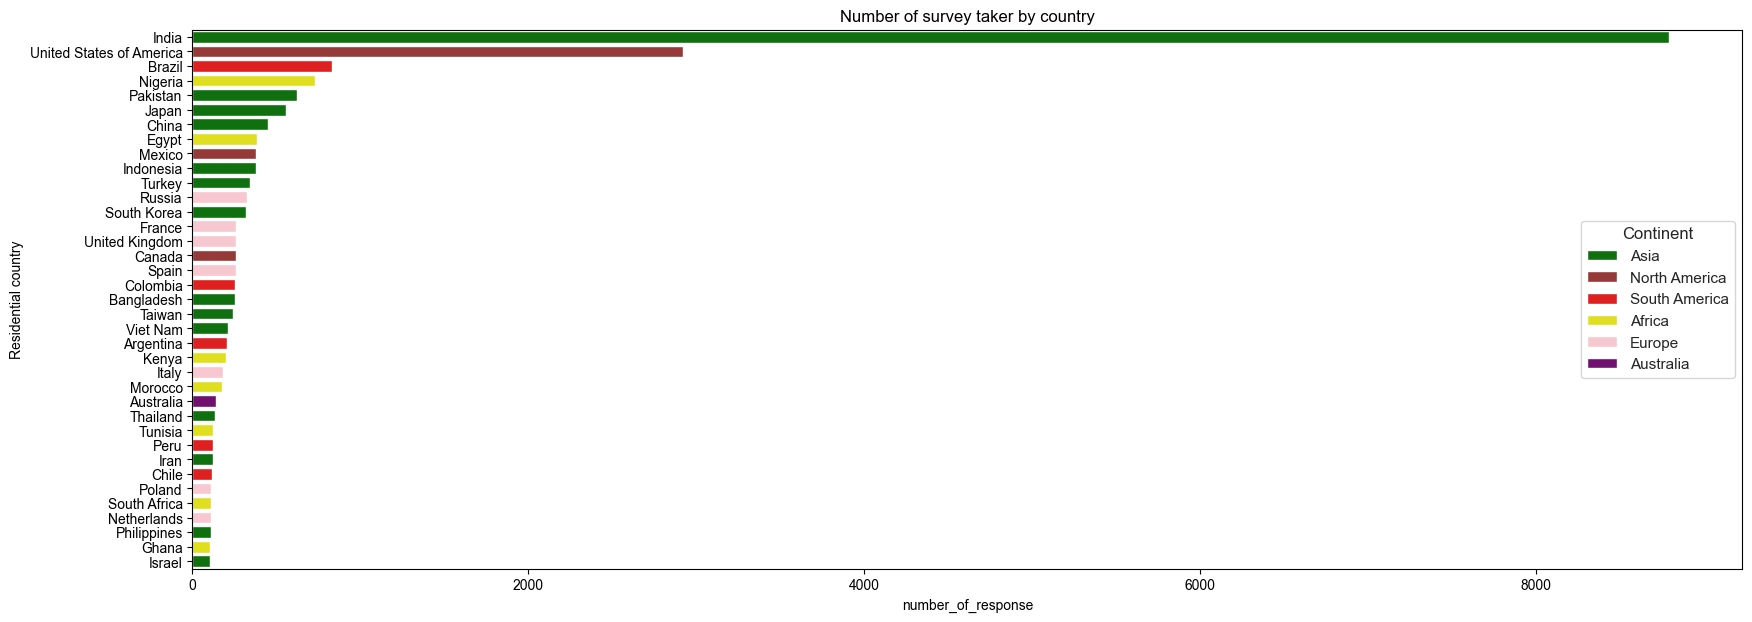

In [6]:
# Draw figure for the total survey response by countries
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x='number_of_response', y='Residential country', data=total_response_df.sort_values(by='number_of_response', ascending=False), palette=continent_color ,hue='Continent', dodge=False)
ax.set_title("Number of survey taker by country")

Looking at the graph, we can see that response from Inida is overwhelmingly large (more than twice as much as the US). Aside from India and the US, other countries seems to be distributed quite uniformly, mixing countries from all Continent. 

Looking closer, we can see that there are only 3 countries from North America, and they are all distributed on the first half of the graph. Another interesting distirbution is with European countries - they are distirbution from the lower first half all the way to the bottom. Asian and African countries seems to be distributed quite even across the graph. And after looking at the graph for sometimes you could notice there is only 1 country from the Australia continent that makes the list is Australia.

Just for better illustration let's see how the Number of survey taker is distributed by number of `Country` in a `Continent`. 

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Number of country in each continent with more than 100 survey response')

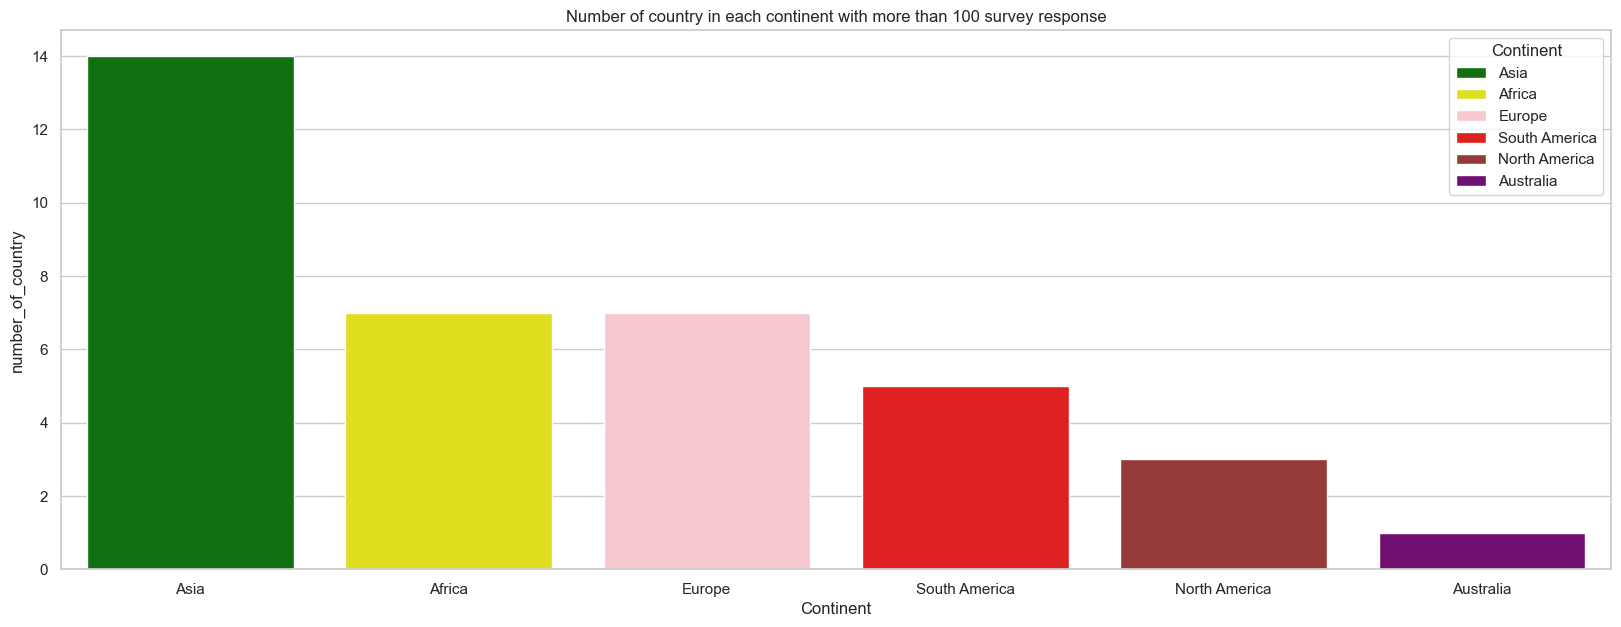

In [7]:
# Calculate total response by continent (in our dataset of countries with over 100 response)
response_by_country_continent = total_response_df.groupby('Continent')['Residential country'].agg(number_of_country='count')
response_by_country_continent = response_by_country_continent.reset_index()

# Plot graph for total response by contient
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(y='number_of_country', x='Continent', data=response_by_country_continent.sort_values(by='number_of_country', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Number of country in each continent with more than 100 survey response")

Notice that most of the survey taker are from Asia, follow by Africa countries. Perhaps this can be explain simply by the correlation to number of countries that is in each continent (Asia is the biggest continent). Still, we can still see that Asian countries are more and more engage in Data Science activities - as Asia become more and more wealthy and well educated. The same can be said about African countries. 

### 3.1 Ratio of people working in company with more than 250 employees

Enterprise size categorization by [OECD](https://data.oecd.org/entrepreneur/enterprises-by-business-size.htm), which relate the number of employees in each company to it's 'size', stated that:
- Micro enterprises: fewer than 10 employees
- Small enterprises: 10 to 49 employees
- Medium-sized enterprises: 50 to 249 employees
- Large enterprises: over 250 employees

Based on that, we are looking for the large enterprise of each country to see how mature and scale of business in each country.

In [8]:
# Filter dataset of survey taker who work in company with more than 250 employees
big_company_df = data[(data['Company size'] == '250-999 employees') | (data['Company size'] == '1000-9,999 employees') | (data['Company size'] == '10,000 or more employees')]

# Include total response for each countries in dataset (to calculate ratio)
big_company_df = pd.merge(big_company_df.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')

# Calculate ratio
big_company_df['big_com_ratio'] = big_company_df['big_company'] * 100 / big_company_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in company in a large enterprise (> 250 employees)')

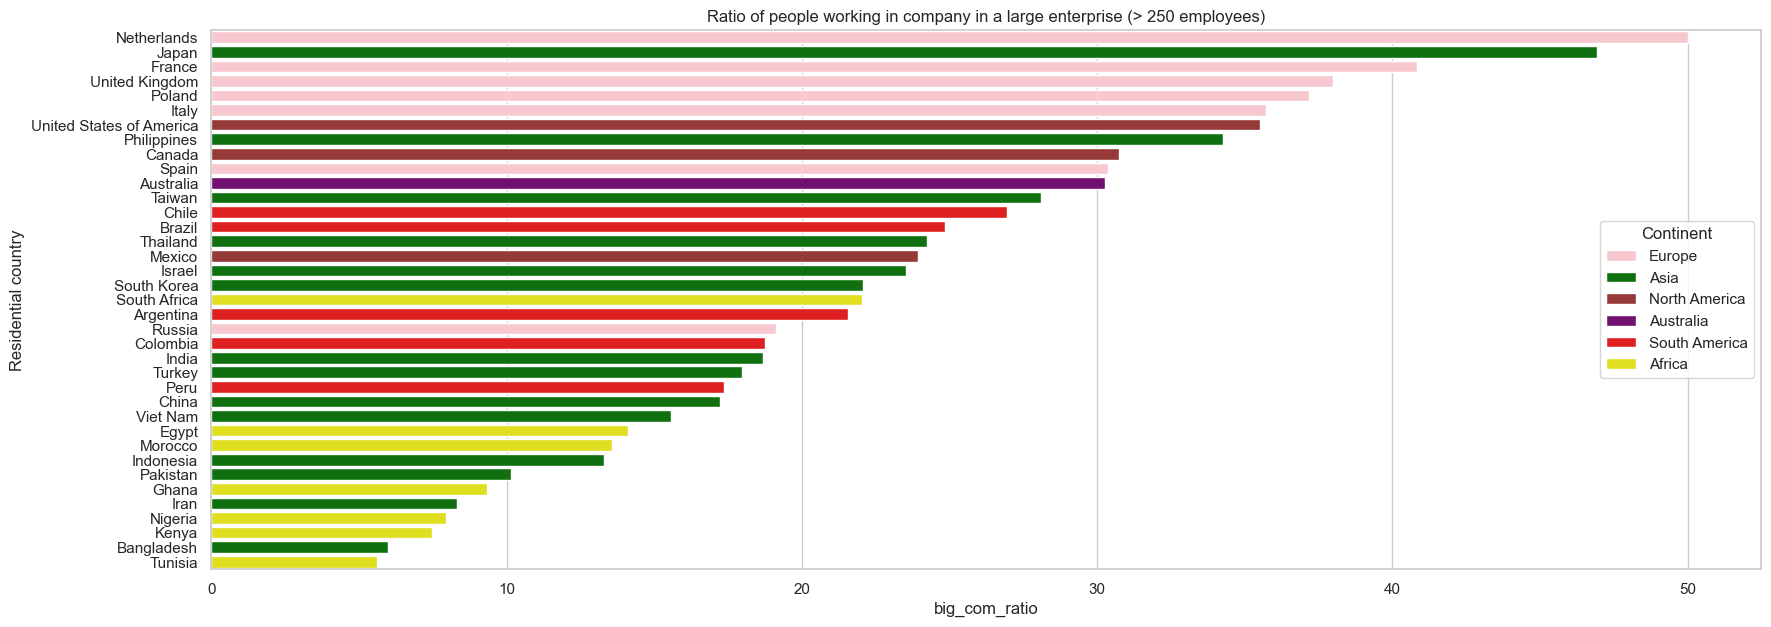

In [9]:
# Plot graph for rato of people who work in company with more than 10000
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='big_com_ratio', y='Residential country', data=big_company_df.sort_values(by='big_com_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in company in a large enterprise (> 250 employees)")

The first ratio describe the information about the scale of the company that the survey taker is employed in. We are looking at companies that are big in scale, nationally or mutinationally. Looking at the graph, we can see the top of the graph is mostly populated by European, North America countries and Australia  - with the country on top is the Netherlands (at ~50% - a ~3% difference from 2nd place country of Japan).

Notice that in Asian countries, Japan is significantly larger in scale than others, follow than India and the Phillippines. Asian countries ranked quite high on the list, although with a big discrepancy among the countries. The gap between the country with most poeple working in big company (Japan) and the country with least people (Bangladesh) is a whooping ~40%.

Vietnam is uppper bottom of the chart (5th from bottom to top in Asia country at ~15%). 

### 3.2 Ratio of people working in companies with more than 10 Data Scientist

There isn't a specific standard on this catagory so I'm taking the middle of of the range. We can consider this benchmark to be a data oriented enterprise (Because having a team of more than 10 Data Scientist would mean that the company has the data to work with and most like its own data pipeline and infrastructe, and have its dedicated Data team). At the very least, this is the hypothesis that I'm going with. 

In [10]:
# Filter dataset of survey taker who work in companies with more than 10 DS
company_w10ds_df = data[(data['Individual responsible'] == '10-14') | (data['Individual responsible'] == '15-19') |(data['Individual responsible'] == '20+')]
# Include total response for each countries in dataset (to calculate ratio)
company_w10ds_df = pd.merge(company_w10ds_df.groupby('Residential country')['Company size'].agg(ds20_count = 'count'), total_response_df, on='Residential country')
# Calculate ratio
company_w10ds_df['com_w10ds_ratio'] = company_w10ds_df['ds20_count'] * 100 / company_w10ds_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in companies with more than 10 Data Scientist')

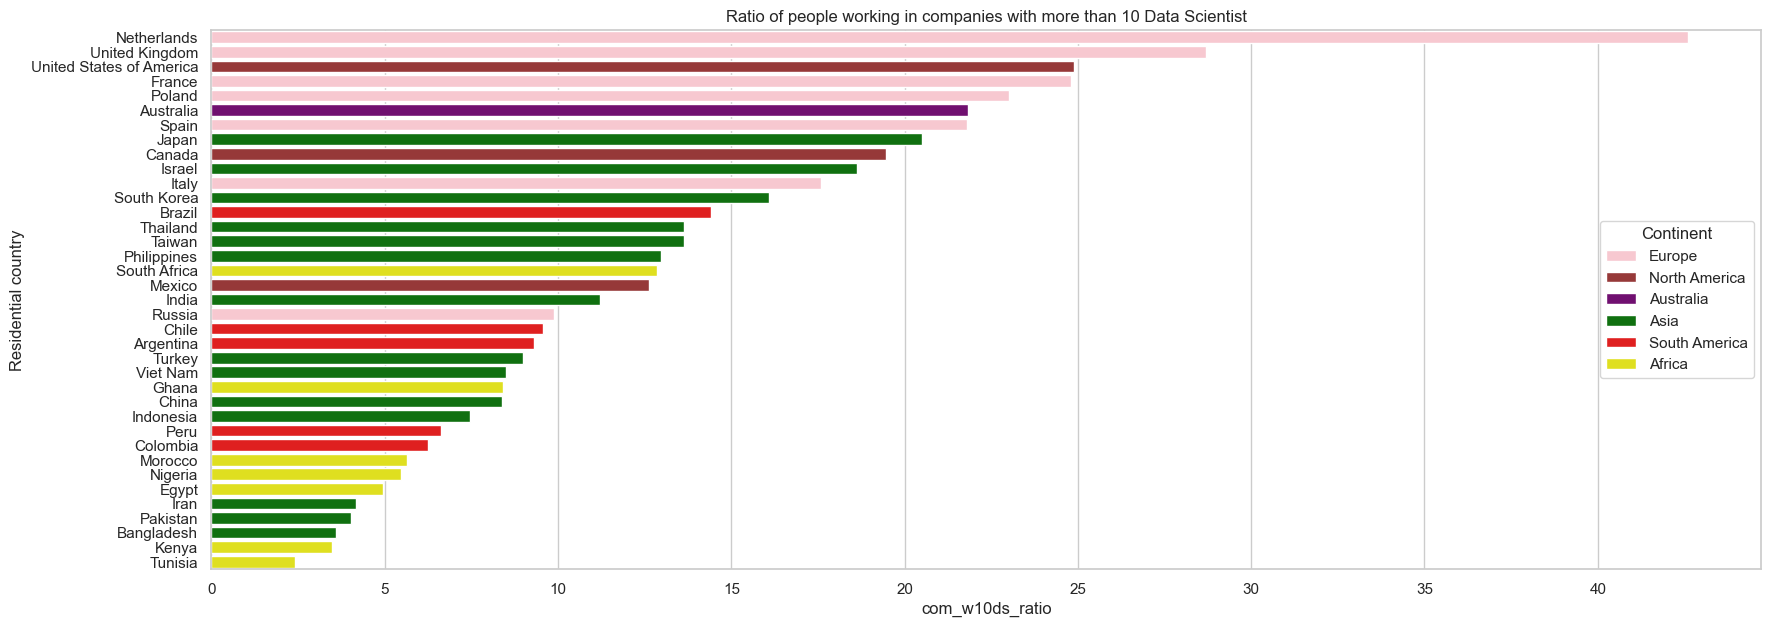

In [11]:
# Plot graph for rato of people who work in companies with more than 10 DS
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='com_w10ds_ratio', y='Residential country', data=company_w10ds_df.sort_values(by='com_w10ds_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in companies with more than 10 Data Scientist")

The second ratio describe the information of the scale of the DS team in the company that the survey taker is employed in. We are looking at companies that have its dedicated team of DS, or is focused in providing DS services. As we can see, once again most of the countries on the top are European countries, with the Netherlands (~43%) being at the top and has a significantly higher score compare to the 2nd place of the UK (~29%). Notice that Russia is at the bottom of the European country again.

We can see that the North American countries (the US and Canada) also score quite high in the list, same goes with Austria. The African countries score very low (at the bottom of the list) with the exception of South Africa at about 10%.

For Asian countries, we see that Japan and Israel are most equiped with companies with a large DS team. Other than that, the other countries score qutie low, spanning from the middle to the end of the graph. Vietnam scored about 8%, which put us at the about the top bottom of the graph.

### 3.3 Ratio of people who have at least 5 years of programming experience

In [12]:
# Filter dataset of survey taker who have at least 5 years of programming experience
ppl_w5y_programming_exp = data[(data['Programming experience'] == '5-10 years') | (data['Programming experience'] == '20+ years') | (data['Programming experience'] == '10-20 years')]
# Include total response for each countries in dataset (to calculate ratio)
ppl_w5y_programming_exp = pd.merge(ppl_w5y_programming_exp.groupby('Residential country')['Company size'].agg(programing_exp = 'count'), total_response_df, on='Residential country')
# Calculate ratio
ppl_w5y_programming_exp['programming_exp_ratio'] = ppl_w5y_programming_exp['programing_exp'] * 100 / ppl_w5y_programming_exp['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who have at least 5 years of programming experience')

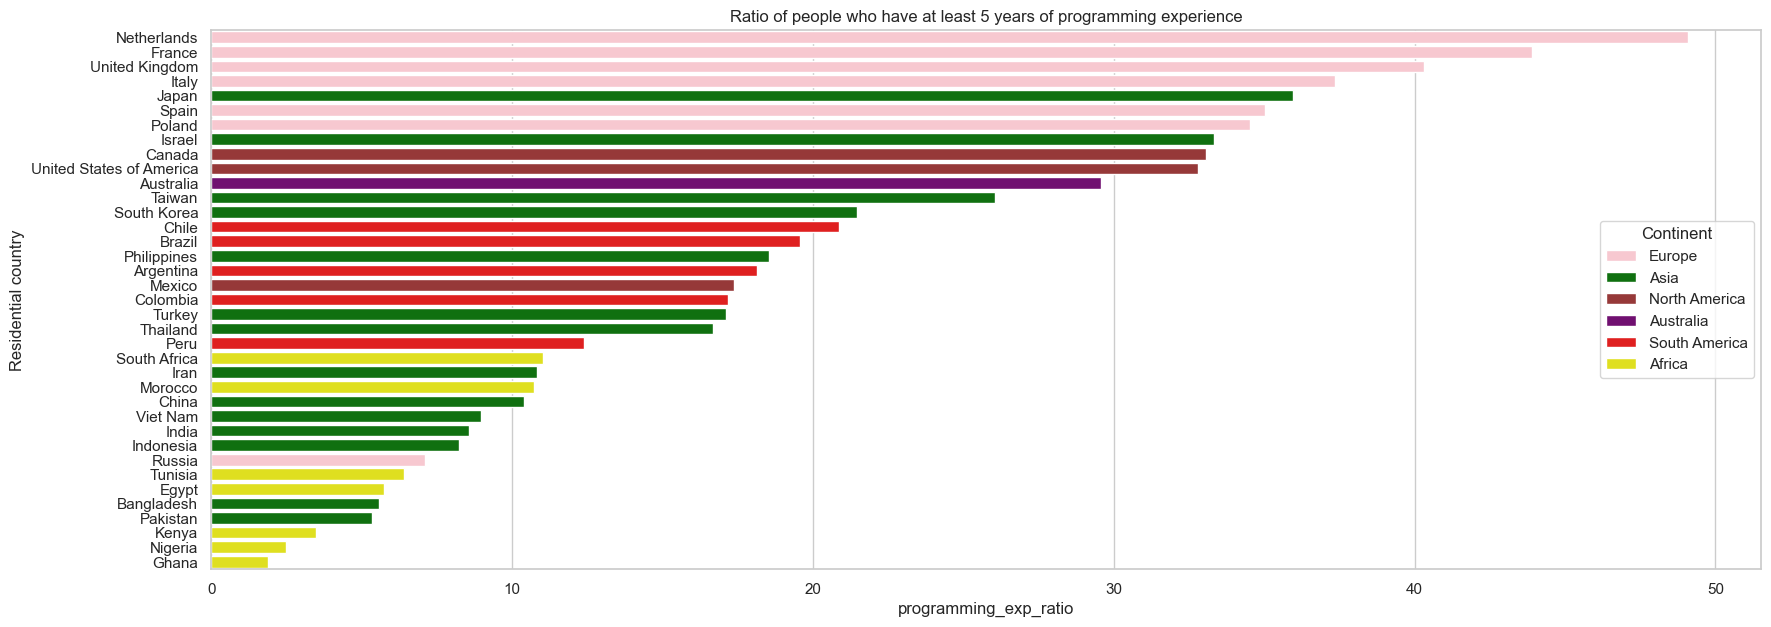

In [13]:
# Plot graph for rato of people who have at least 5 years of programming experience
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='programming_exp_ratio', y='Residential country', data=ppl_w5y_programming_exp.sort_values(by='programming_exp_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who have at least 5 years of programming experience")

The third ratio describe the talents of each countries with programming experience (exceed 5 years mark). Again, the European countries dominated the top of the graph, with the Netherlands at the top again at ~50% of survey taker are have at least 5 years of programming experience. The North America and Australia follow suits European countries at about 33%. 

South American countries populate the middle of the graph, and African countries sitting at the bottom of the graph (some countries don't get to the 10% mark).

Asian countries are most ranged, with Japan having the higest ratio at ~35%, to the Pakistan at the bottom of ~5%. Vietnam sits just behind China (~10%) at about 9%.  

### 3.4 Ratio of people who have at least 5 years of ML experience

In [14]:
# Filter dataset of survey taker who have at least 5 years of ML experience
ppl_w5y_ml_exp = data[(data['ML experience'] == '5-10 years') | (data['ML experience'] == '20 or more years') | (data['ML experience'] == '10-20 years')]
# Include total response for each countries in dataset (to calculate ratio)
ppl_w5y_ml_exp = pd.merge(ppl_w5y_ml_exp.groupby('Residential country')['Company size'].agg(ml_exp = 'count'), total_response_df, on='Residential country')
# Calculate ratio
ppl_w5y_ml_exp['ml_exp_ratio'] = ppl_w5y_ml_exp['ml_exp'] * 100 / ppl_w5y_ml_exp['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who have at least 5 years of ML experience')

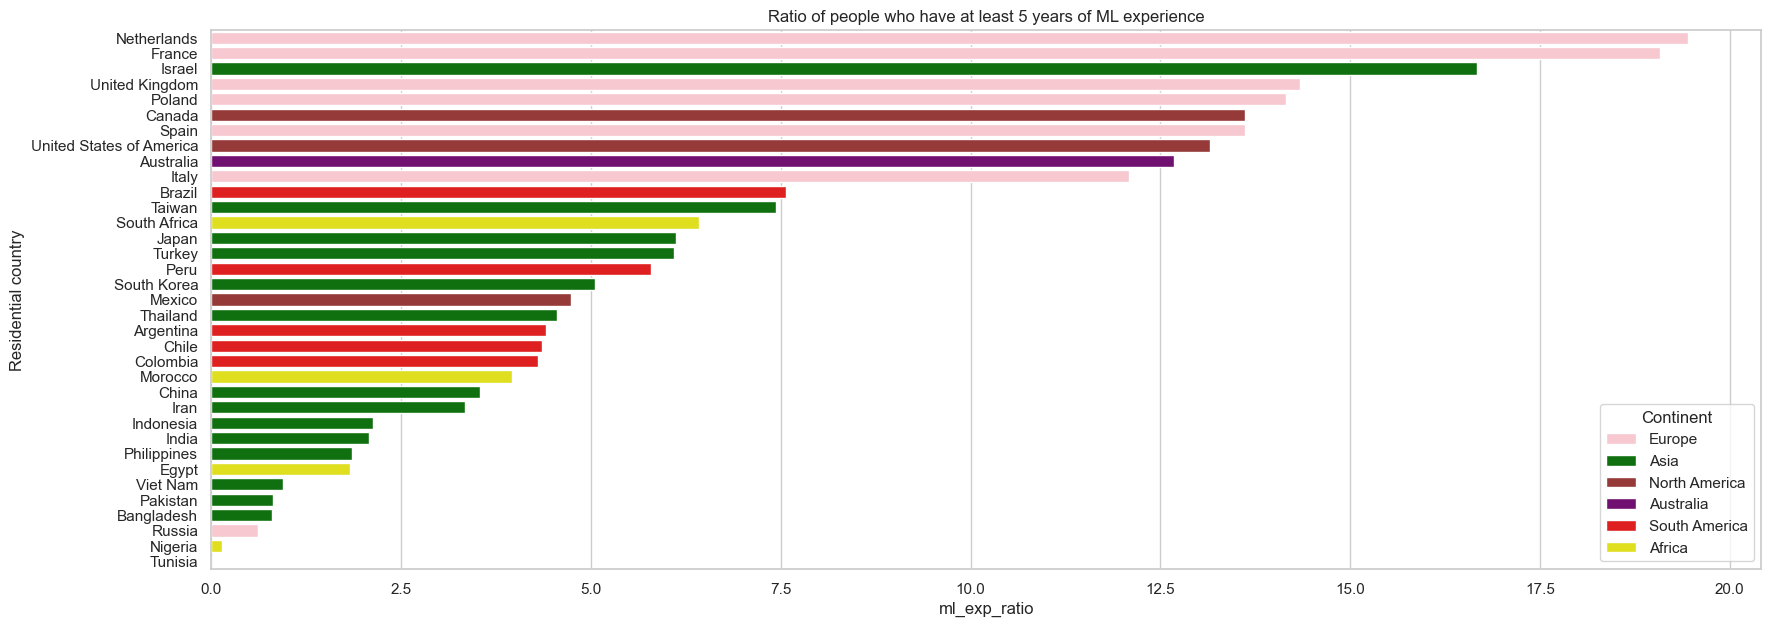

In [15]:
# Plot graph for rato of people who have at least 5 years of ML experience
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ml_exp_ratio', y='Residential country', data=ppl_w5y_ml_exp.sort_values(by='ml_exp_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who have at least 5 years of ML experience")

The fourth ratio describe the talents of each countries with ML experience (exceed 5 years mark). One thing we notice about this graph compare to the previous graph is that it range is significantly shorter (at maximum of ~20% compare to ~50%). The European countries dominate the top, with the Netherlands at the top at ~19%. Follow suits are the North Aemrican countries at ~13%. Most of countries from Afria, Asia and South America are concentrated at the middle - bottom of the graph (range 5(+-2) %).

Surprisingly, Israel is the Asian country with the highest score at ~16%, and not Japan (~6%). 

Vietnam is ranked at the very bottom group with ~1% survey taker has more than 5 years in ML experience. Surprisingly, Russia is ranked lower, with less than 1%.

### 3.5 Ratio of peole who make more than 10,000 dollars a year

In [16]:
# Filter dataset of survey taker who make more than 10,000 dollars a year
ppl_make_m10k = data[(data['Current income'] == '> 10,000')]
# Include total response for each countries in dataset (to calculate ratio)
ppl_make_m10k = pd.merge(ppl_make_m10k.groupby('Residential country')['Company size'].agg(salary10000_count = 'count'), total_response_df, on='Residential country')
# Calculate ratio
ppl_make_m10k['10k_ratio'] = ppl_make_m10k['salary10000_count'] * 100 / ppl_make_m10k['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who make more than 10,000 dollars a year')

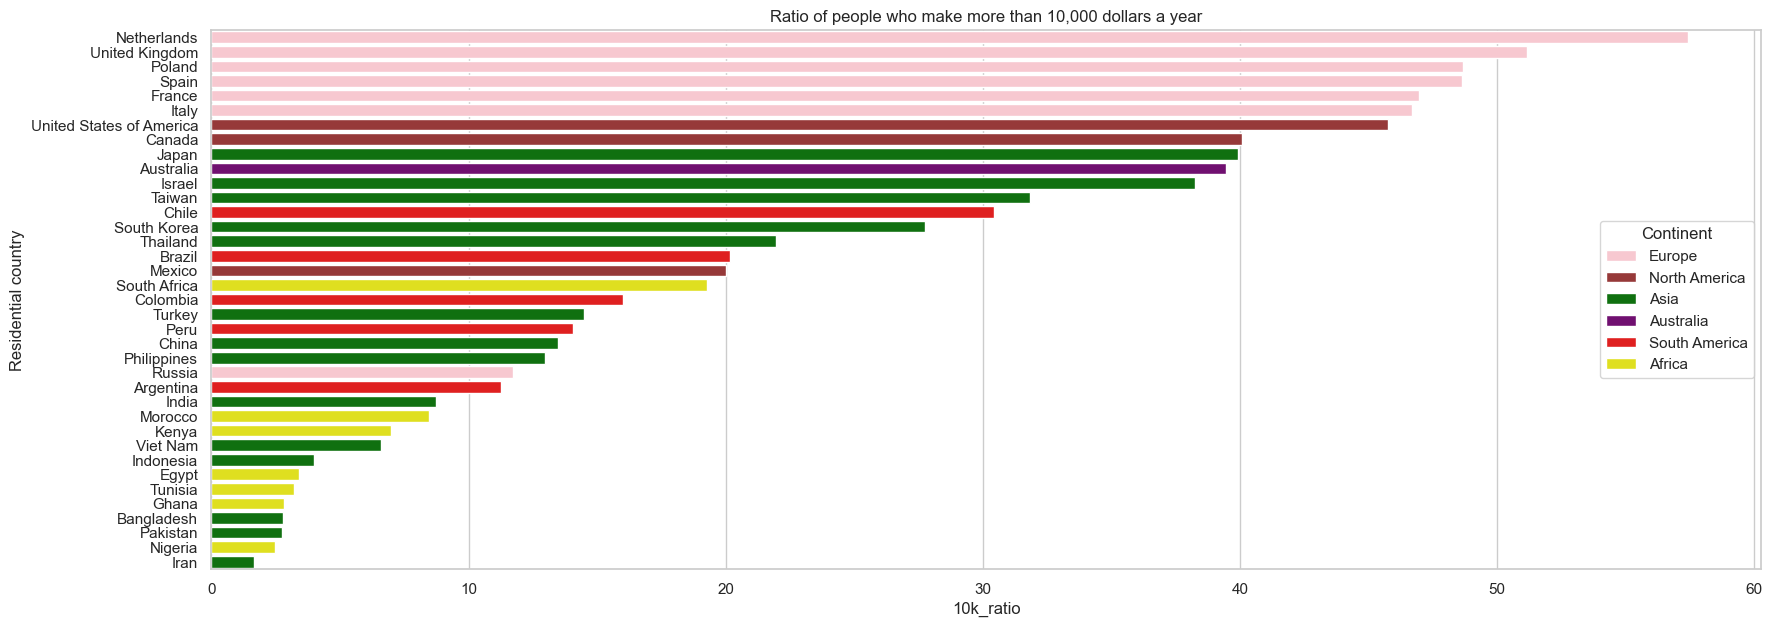

In [17]:
# Plot graph for rato of people who make more than 10,000 dollars a year
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='10k_ratio', y='Residential country', data=ppl_make_m10k.sort_values(by='10k_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who make more than 10,000 dollars a year")

The fifth ratio describe the infomation of people who make more than 10,000 dollars/year (about 833 dollars/month ~ 20 millons vnd/month). As can see that the top 6 countries on top are all European countries - with the top country being the Netherlands (~ 56%). Folliwng by North American countries (US, Canada) and Australia. 

South America countries are concentrated in the middle of the graph (10 - 30%). While Asian countries are distributed from top to bottom, the difference is very large. The top Asian country is Japan with ~40% of people earn more than 10,000$/year, while the bottom country is Iran with only ~2%. Vietnam is ranked close to the bottom of the graph with ~6%.

### 3.6 Ratio of people working in each industry in each country in Asia

Before dive into this analysis, let's prepare our code that we will be using to plot all graphs for all the continents. We have to do a little bit tweeking with our data to get the ratio of each industries of people in each countries and sort them by continent. 

In [18]:
# Counting number of people in each countries by their current industry
ppl_in_industry = data.groupby(['Residential country', 'Continent', 'Current industry'])['Current industry'].agg(count = 'count')

# Filter people who are in each continent
# I'm using unstack here because the above group by turn the dataframe  into a multindex
ppl_in_industry_asia = ppl_in_industry.loc[slice(None), 'Asia', slice(None), :].unstack(level='Current industry')
ppl_in_industry_europe = ppl_in_industry.loc[slice(None), 'Europe', slice(None), :].unstack(level='Current industry')
ppl_in_industry_africa = ppl_in_industry.loc[slice(None), 'Africa', slice(None), :].unstack(level='Current industry')
ppl_in_industry_namerica = ppl_in_industry.loc[slice(None), 'North America', slice(None), :].unstack(level='Current industry')
ppl_in_industry_samerica = ppl_in_industry.loc[slice(None), 'South America', slice(None), :].unstack(level='Current industry')
ppl_in_industry_australia = ppl_in_industry.loc[slice(None), 'Australia', slice(None), :].unstack(level='Current industry')

# Calculating sum of people in industries in Asia by country
ppl_in_industry_asia['sum'] = ppl_in_industry_asia.sum(axis=1)
ppl_in_industry_europe['sum'] = ppl_in_industry_europe.sum(axis=1)
ppl_in_industry_africa['sum'] = ppl_in_industry_africa.sum(axis=1)
ppl_in_industry_namerica['sum'] = ppl_in_industry_namerica.sum(axis=1)
ppl_in_industry_samerica['sum'] = ppl_in_industry_samerica.sum(axis=1)
ppl_in_industry_australia['sum'] = ppl_in_industry_australia.sum(axis=1)

# Calculating ratio of people in each industries by country
# For Asia
industry_columns = ppl_in_industry_asia['count'].columns
ppl_in_industry_asia[industry_columns + ' Ratio'] = ppl_in_industry_asia['count'].div(ppl_in_industry_asia['sum'], axis=0)
# For Europe
industry_columns = ppl_in_industry_europe['count'].columns
ppl_in_industry_europe[industry_columns + ' Ratio'] = ppl_in_industry_europe['count'].div(ppl_in_industry_europe['sum'], axis=0)
# For Africa
industry_columns = ppl_in_industry_africa['count'].columns
ppl_in_industry_africa[industry_columns + ' Ratio'] = ppl_in_industry_africa['count'].div(ppl_in_industry_africa['sum'], axis=0)
# For North America
industry_columns = ppl_in_industry_namerica['count'].columns
ppl_in_industry_namerica[industry_columns + ' Ratio'] = ppl_in_industry_namerica['count'].div(ppl_in_industry_namerica['sum'], axis=0)
# For South America
industry_columns = ppl_in_industry_samerica['count'].columns
ppl_in_industry_samerica[industry_columns + ' Ratio'] = ppl_in_industry_samerica['count'].div(ppl_in_industry_samerica['sum'], axis=0)
# For Australia
industry_columns = ppl_in_industry_australia['count'].columns
ppl_in_industry_australia[industry_columns + ' Ratio'] = ppl_in_industry_australia['count'].div(ppl_in_industry_australia['sum'], axis=0)


# Fill in for countries who doesn' have any survey taker to work in certain industries
ppl_in_industry_asia.fillna(0, inplace=True)
ppl_in_industry_europe.fillna(0, inplace=True)
ppl_in_industry_africa.fillna(0, inplace=True)
ppl_in_industry_namerica.fillna(0, inplace=True)
ppl_in_industry_samerica.fillna(0, inplace=True)
ppl_in_industry_australia.fillna(0, inplace=True)

The first continent we will be looking at is Asia.

Text(0.5, 1.0, 'Ratio of people working in each industry in each country in Asia')

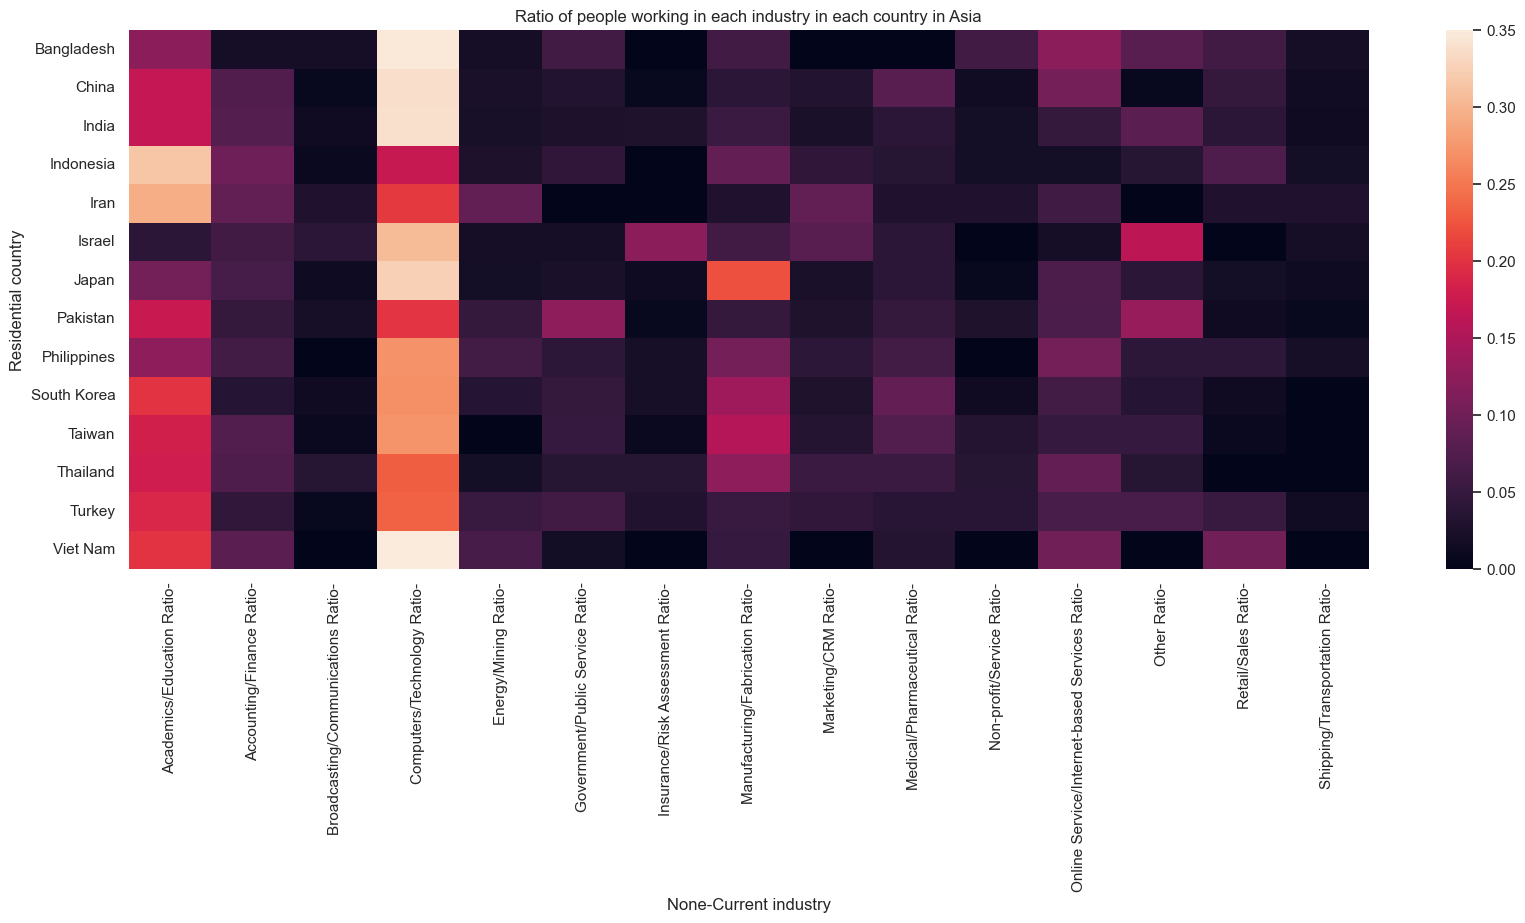

In [19]:
# Plot graph for ratio of people working in each industry in each country in Asia
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.heatmap(ppl_in_industry_asia.loc[slice(None), 'Academics/Education Ratio':])
ax.set_title("Ratio of people working in each industry in each country in Asia")

> About the graph: The heat map illustrates the distribution of individuals across different industries within each country. Each row in the map corresponds to a specific country's proportional breakdown of people within various sectors, totaling to 1 for each country.

The sixth ratio describe the trends in Data Science work in industries in Asia. Most of Asian countries are very Academics/Education and Computer/Technology oriented. Other than that, the Manufacturing/Frabrication industry is also attract some attention from countries like Japan, Taiwan, South Korea.

Overall, we can safely say that Asia is most developed in Computer/Technology and Academic/Education, but lacks delopment in other industries. 

With Vietnam, our direction seems to be heading toward Computer/Technology and to a lesser extends Academic, while Online service and Retails also shows some attention, and to a lesse degree Finance and accounting, but just like with the whole of Asia, we are not paying attention in a lot of industries, which could means we are missing out on quite a lot of opportunity.

### 3.7 Ratio of people working in each industry in each country in Europe

Text(0.5, 1.0, 'Ratio of people working in each industry in each country in Europe')

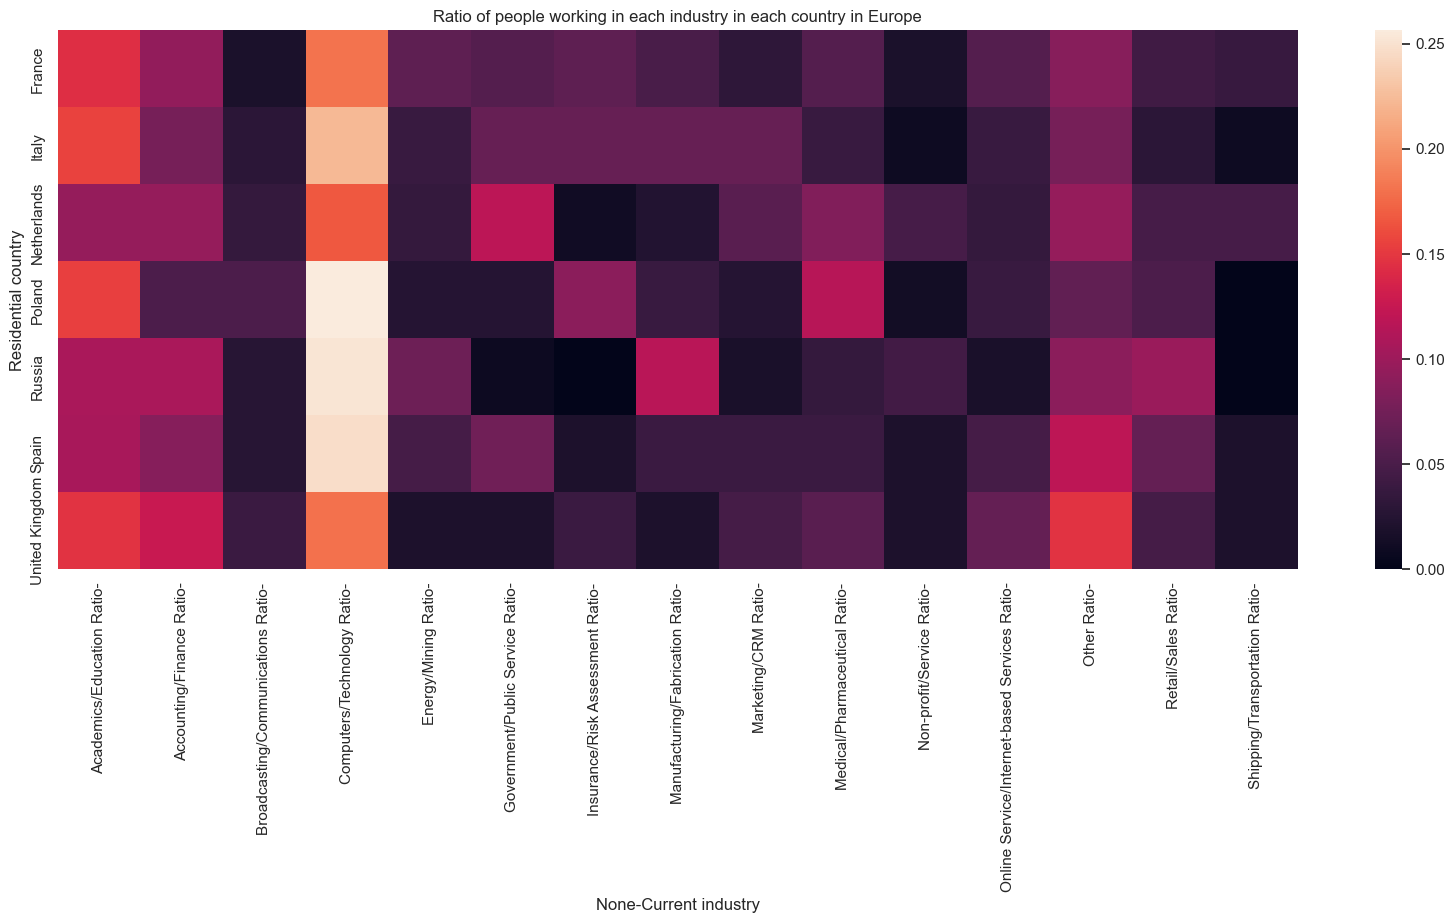

In [20]:
# Plot graph for ratio of people working in each industry in each country in Asia
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.heatmap(ppl_in_industry_europe.loc[slice(None), 'Academics/Education Ratio':])
ax.set_title("Ratio of people working in each industry in each country in Europe")

> About the graph: The heat map illustrates the distribution of individuals across different industries within each country. Each row in the map corresponds to a specific country's proportional breakdown of people within various sectors, totaling to 1 for each country.

The seventh ratio describe the trends in Data Science work in industries in Europe. A big different that we see here in the graph for Europe is that it is so much more diverse and vary by countries than Asia - which is more concentrated in 1 or 2 industry.

Most countries in Europe are span out in many industry, though in the grand scheme of things, they mostly still focus on Computer/Technology and Academics/Education industry. Here, we could make an educated guess that because there are a lot of data available in these industries, which encourage the growth of data manipulation and analysis practices.

Other that that, Finance is also a growing Data industry in Europe. 

By country, we can see that the Netherlands is most developed in Tech, Goverment and Public relation, Education and Academic and Finance. Poland seems to be paying more attention in their Medical and Pharmaceutical industry (in Data Science), and the same with Russia and the Manufacturing and Fabrication industry.

Overall, the least attentioned industries in Europe are Broadcast and Communication, Non-profit and Service and Shipping/Transportation.

### 3.8 Ratio of people working in each industry in each country in Africa


Text(0.5, 1.0, 'Ratio of people working in each industry in each country in Africa')

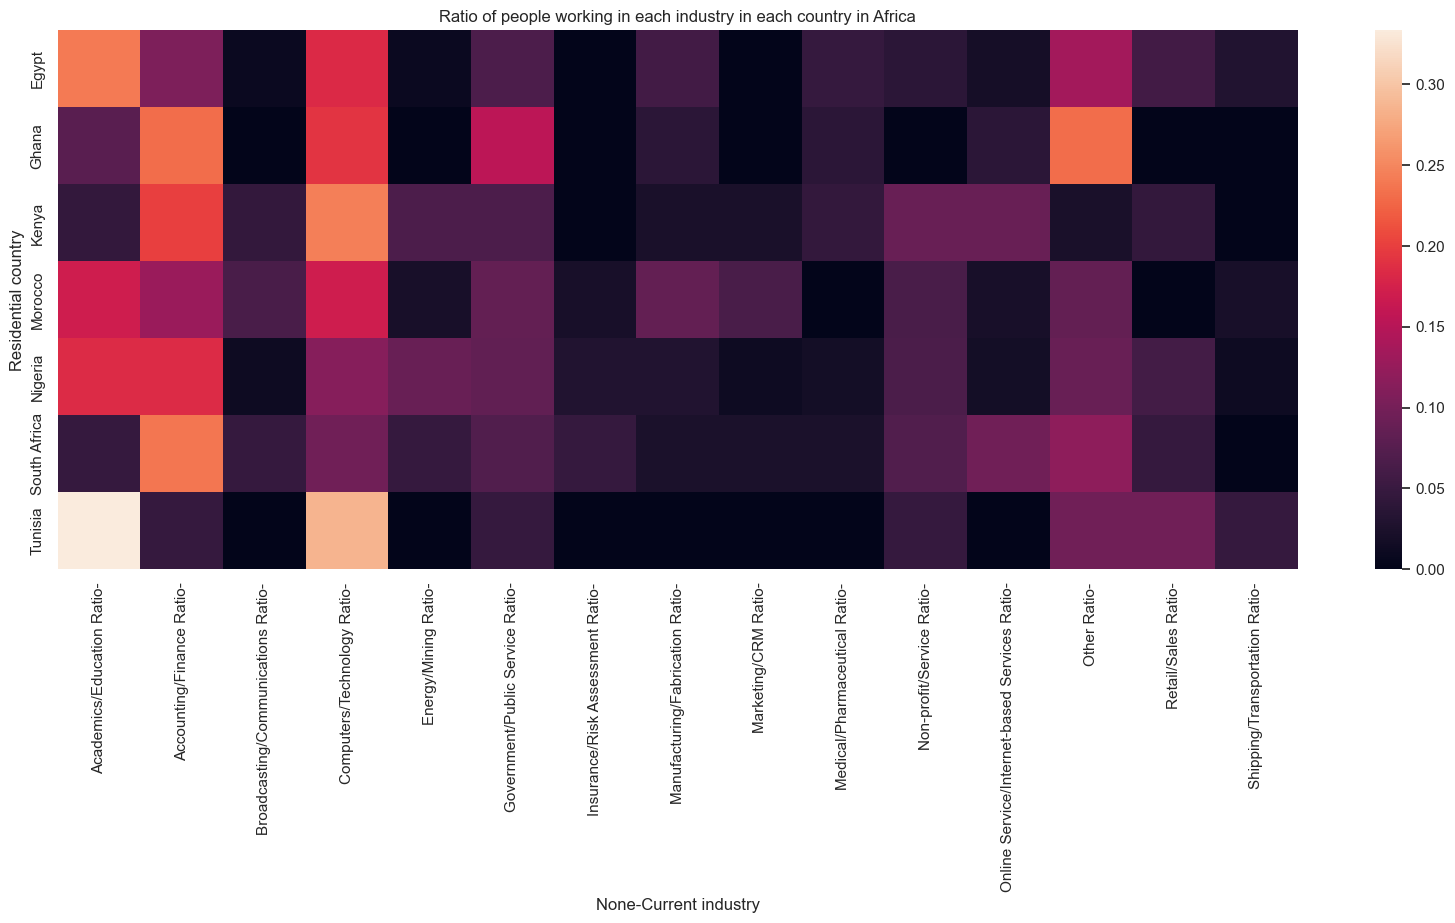

In [21]:
# Plot graph for ratio of people working in each industry in each country in Africa
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.heatmap(ppl_in_industry_africa.loc[slice(None), 'Academics/Education Ratio':])
ax.set_title("Ratio of people working in each industry in each country in Africa")

> About the graph: The heat map illustrates the distribution of individuals across different industries within each country. Each row in the map corresponds to a specific country's proportional breakdown of people within various sectors, totaling to 1 for each country.

The eighth ratio describe the trends in Data Science work in industries in Africa. Compared to Asia and Europe, Africa is paying its attention quite evenly toward specific and limited number of industry. 

Unlike Asia which seems to only focus on Tech and to a lesser extend Academic, Africa pays attention to the two and another industry - Finance, quite evenly. Unlike Europe which spread out their attentions to many industries, almost all countries in Africa is focus on growing their Tech, Academic and Finance. Though there are some countries trying to go their own way like with Ghana with its Government and Public service, the continent seems to be pushing forward with Tech, Finance and Academic. 

### 3.9 Ratio of people working in each industry in each country in North America

Text(0.5, 1.0, 'Ratio of people working in each industry in each country in North America')

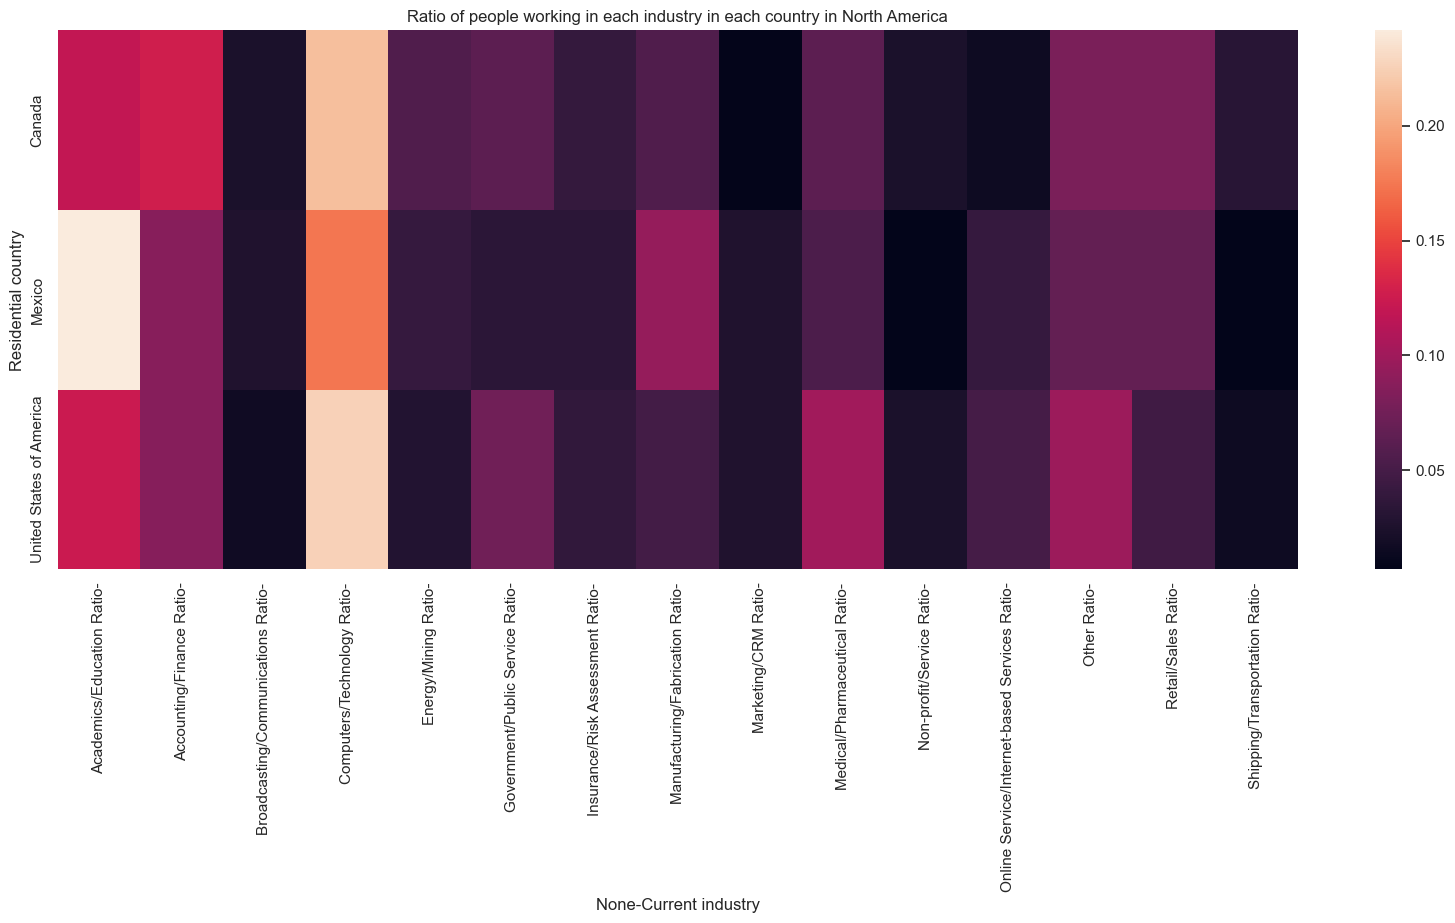

In [22]:
# Plot graph for ratio of people working in each industry in each country in North America
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.heatmap(ppl_in_industry_namerica.loc[slice(None), 'Academics/Education Ratio':])
ax.set_title("Ratio of people working in each industry in each country in North America")

> About the graph: The heat map illustrates the distribution of individuals across different industries within each country. Each row in the map corresponds to a specific country's proportional breakdown of people within various sectors, totaling to 1 for each country.

The nineth ratio describe the trends in Data Science work in industries in North America. There is only 3 countries in North America that make our list, making the graph for North America quite sparse. 

America and Canada seems to have similar economy centering Data Science: both are strong in Computer and Tech, Academic, and seems to have similar attention to ther fields like Government and Public Service, Insurance and Risk Asessment, Manufacturing and Fabricatin, Retail and Sales. With that, Canada seems to be paying more attention to Energy and Data mining, while America is might be the world leader on Medical and Pharmaceutical. 

Mexico is heading to a different way, as its main focus is in Academic, Tech and Computer and Manufacturing and Fabrication.

### 3.10 Ratio of people working in each industry in each country in South America

Text(0.5, 1.0, 'Ratio of people working in each industry in each country in South America')

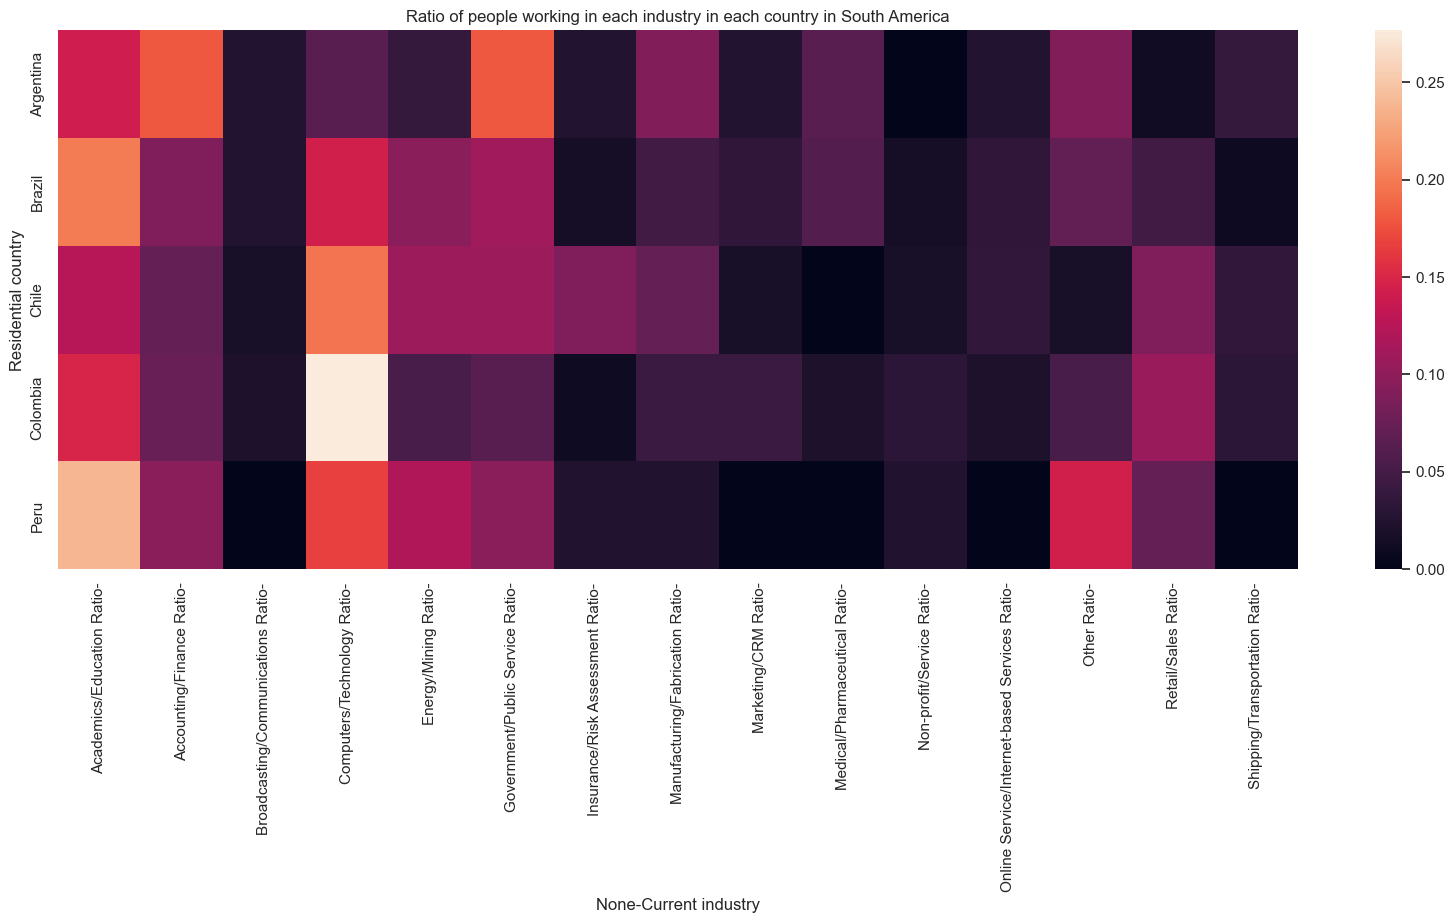

In [23]:
# Plot graph for ratio of people working in each industry in each country in South America
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.heatmap(ppl_in_industry_samerica.loc[slice(None), 'Academics/Education Ratio':])
ax.set_title("Ratio of people working in each industry in each country in South America")

> About the graph: The heat map illustrates the distribution of individuals across different industries within each country. Each row in the map corresponds to a specific country's proportional breakdown of people within various sectors, totaling to 1 for each country.

The tenth ratio describe the trends in Data Science work in industries in South America. South America is very vibrant with more diverse focus on many industries than maybe any other continent. Its focus is mostly in Tech and Academic - which is similar to other continent, but it also focus a lot on Accounting and Finance (especially Agentina), Energy and mining, Government and Public service. Retual and sales is also an idustry being paid attention to (mostly in Colombia, Chile and Peru), though to a lesser extends.

### 3.11 Ratio of people working in each industry in each country in Australia

Text(0.5, 1.0, 'Ratio of people working in each industry in each country in North America')

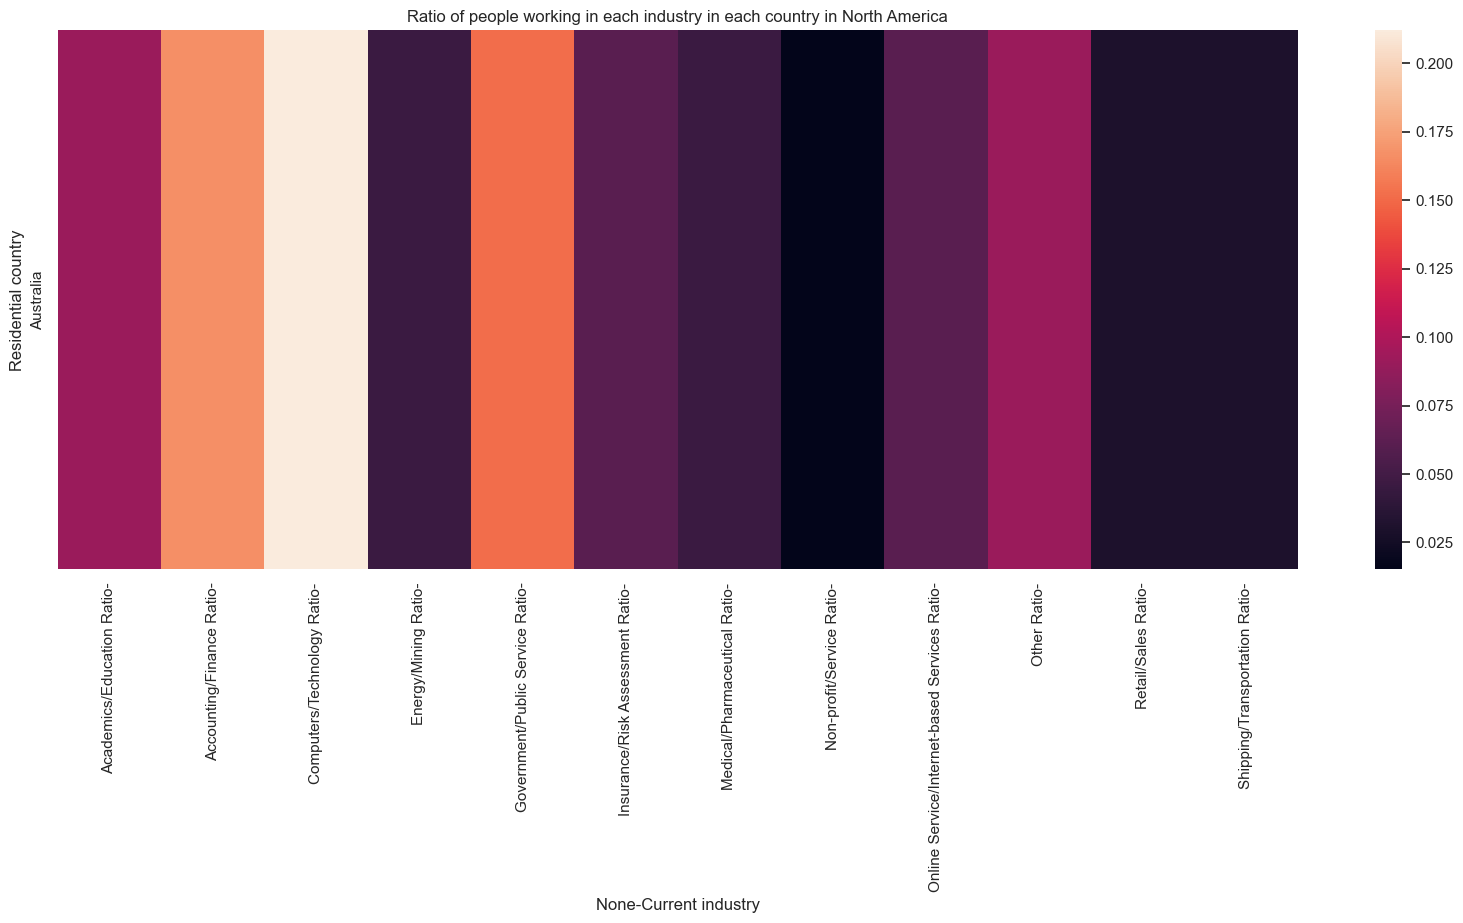

In [24]:
# Plot graph for ratio of people working in each industry in each country in Australia
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.heatmap(ppl_in_industry_australia.loc[slice(None), 'Academics/Education Ratio':])
ax.set_title("Ratio of people working in each industry in each country in North America")

> About the graph: The heat map illustrates the distribution of individuals across different industries within each country. Each row in the map corresponds to a specific country's proportional breakdown of people within various sectors, totaling to 1 for each country.

The eleventh ratio describe the trends in Data Science work in industries in Oceana. There is only 1 Oceanic country that make our list is Australia. It's seems that Australia is also very focus on Tech, but unlike other continent (or rather countries) it's more pays more attention to Government and Public service and Accounting and Finance. Among other industries, it seems like the Australia is paying more attention to Academic and Education, Insurance and Risk asessment and Online Service and Internet base service.

### 3.12 Ratio of people who are 22-30 years old who took the survey (junior in their career)

In [25]:
# Filter out survey taker aged from 22 - 30
young_people = data[(data['Age'] == '22-24') | (data['Age'] == '25-29')]
# Include total response for each countries in dataset (to calculate ratio)
young_people_distribution = pd.merge(young_people.groupby('Residential country')['Company size'].agg(young_people_count = 'count'), total_response_df, on='Residential country')
# Calculate ratio
young_people_distribution['young_ppl_ratio'] = young_people_distribution['young_people_count'] * 100 / young_people_distribution['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people from 20-30 years old who completed the survey')

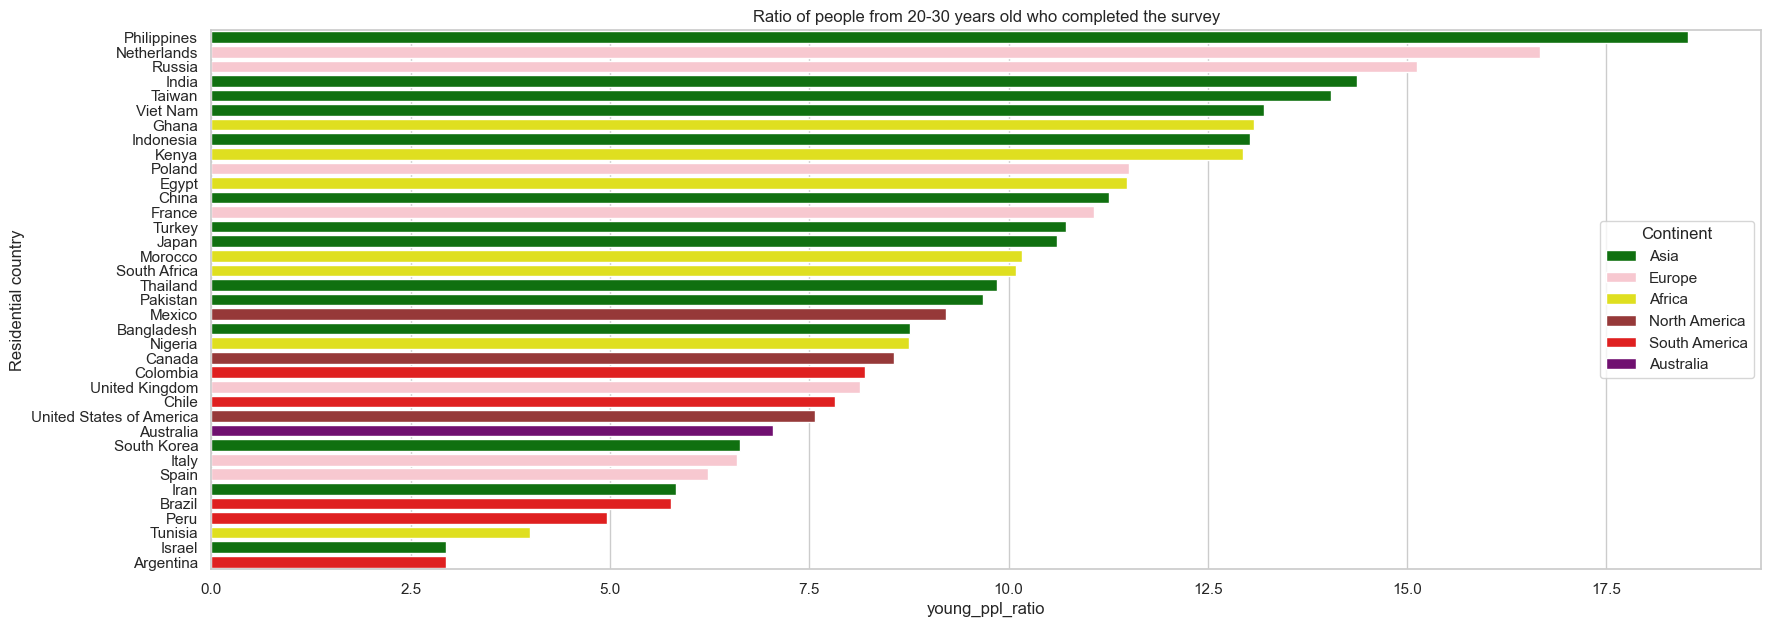

In [26]:
# Plot graph for ratio of survey taker who are 22 - 30 years old
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='young_ppl_ratio', y='Residential country', data=young_people_distribution.sort_values(by='young_ppl_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people from 20-30 years old who completed the survey")

The twelfth ratio describe the infomation of people who are in their 20s in each countries. We are trying to look at the ratio of juniors with less experience and expertise for each countries. The range of the graph isn't very high, with top of ~18%. This time, the top of the graph is more concentrated with Asian and African countries, with the Phillipines at the very top, and while following with the Netherlands and Russia (2 Europe contries), are continuely followed by exclusively Asian and African countries. Overall, we can see that African and Asian countries dominate the top half of the graph.

While other Europe country (like the UK, Italy, Spain) are sintuated at the bottom of the graph, along with North and South American countries. Interestingly, Isreal and Iran are 2 Asian countries that also have very low ratio of people in their 20s. Vietnam is a relatively young country, with more than 12.5% of it's survey taker is in their 20s.

### 3.13 Ratio of young (22 - 30 years old) people who are male participated in the survey

In [27]:
# Count number of survey taker from 22 - 30 years old from each country
total_young_response_df = young_people.groupby(['Residential country', 'Continent'])['Residential country'].agg(number_of_response = 'count')
# Filter out survey taker who are man
young_man = young_people[(young_people['Gender'] == 'Man')]

# Include total response from young people for each countries in dataset (to calculate ratio)
young_man = pd.merge(young_man.groupby(['Residential country', 'Continent'])['Gender'].agg(male_count = 'count'), total_young_response_df, on=['Residential country', 'Continent'])

# Calculate ratio
young_man['man_ratio'] = young_man['male_count'] * 100 / young_man['number_of_response']

# Reset index for plot
young_man.reset_index(inplace=True)

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of young (20 - 30 years old) people who are male participated in the survey')

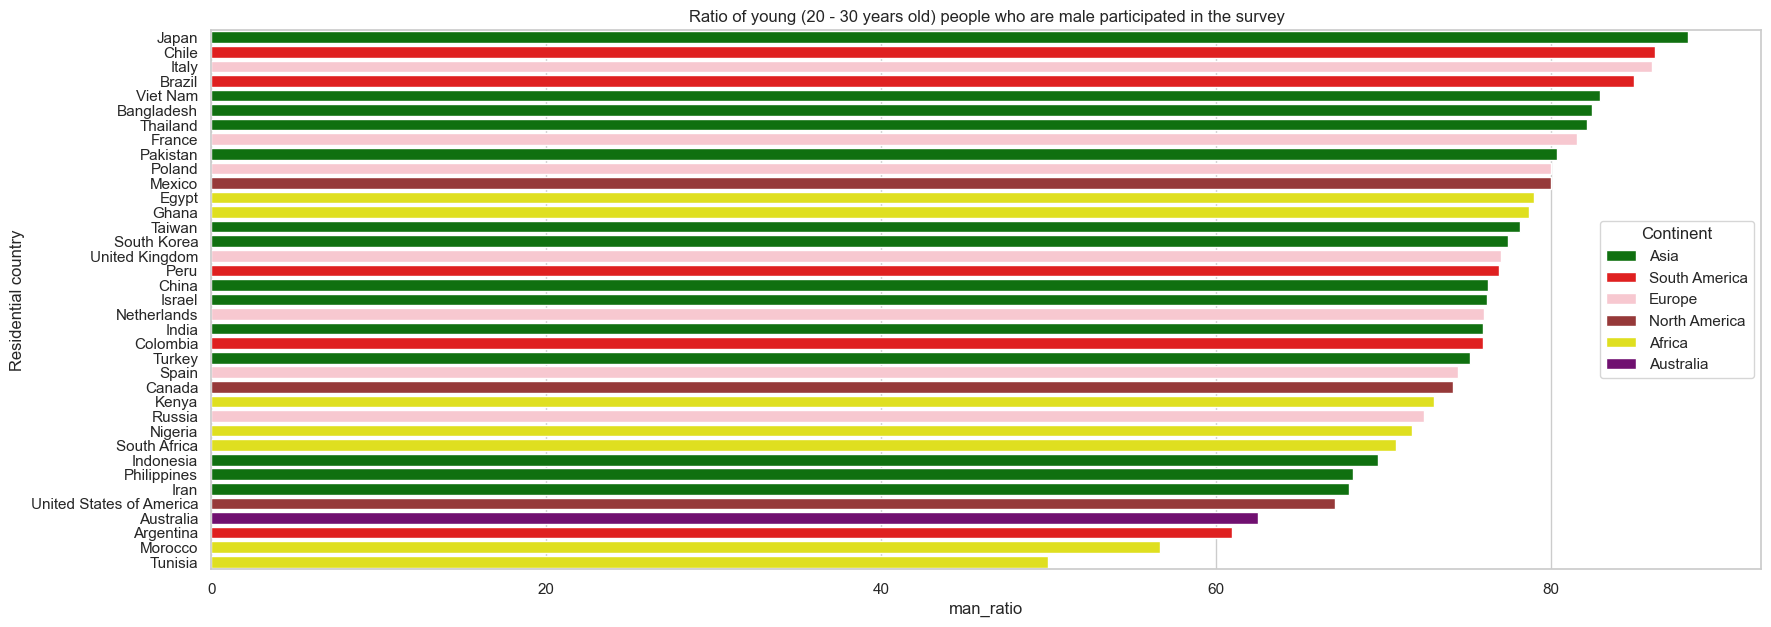

In [28]:
# Plot graph for ratio of young people who are male
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='man_ratio', y='Residential country', data=young_man.sort_values(by='man_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of young (20 - 30 years old) people who are male participated in the survey")

The thirteenth ratio describes the infomation of young people (20 - 30 years old) who are identify as Men while completing the survey. At a glance, we can see that most of the young people who are takes the survey are male. The distribution of the graph is from 50% - 90%, which signal a future of this field is going to be male-dominated. 

By continent, the distribution is very chaostic and mixed. Overall, almost all countries are very skewed male, with the execption of `Tunisia` and one of its African fellow, `Moroco`.

Vietnam ranked quite high in the list, with over 80% young people who complete the survey are male.

### 3.14 Ratio of young (22 - 30 years old) people who have (or planning to obtain) a Master or higher education degree

In [29]:
# Create a copy of young people education for easy manipulation
higher_education = young_people.copy()

# Transform category of higher education into our prefered format
# For us here is to know which person has (or plan to have) Master or higher education
higher_education['Higher education?'] = higher_education['Higher education?'].str.replace('Doctoral degree', ">= Master's degree").replace('Professional doctorate', ">= Master's degree").replace("Master's degree", ">= Master's degree")

# Filter out people who have (or plan to have) Master or higher education
higher_education = higher_education[(higher_education['Higher education?'] == ">= Master's degree")]

# Include young total response for each countries in dataset (to calculate ratio)
higher_education = pd.merge(higher_education.groupby(['Residential country', 'Continent'])['Higher education?'].agg(high_ed_count = 'count'), total_young_response_df, on=['Residential country','Continent'])

# Calculate ratio
higher_education['higher_ed_ratio'] = higher_education['high_ed_count'] * 100 / higher_education['number_of_response']

# Reset index for plot
higher_education.reset_index(inplace=True)

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of young (20 - 30 years old) people who have (or planning to obtain) a Master or higher education degree')

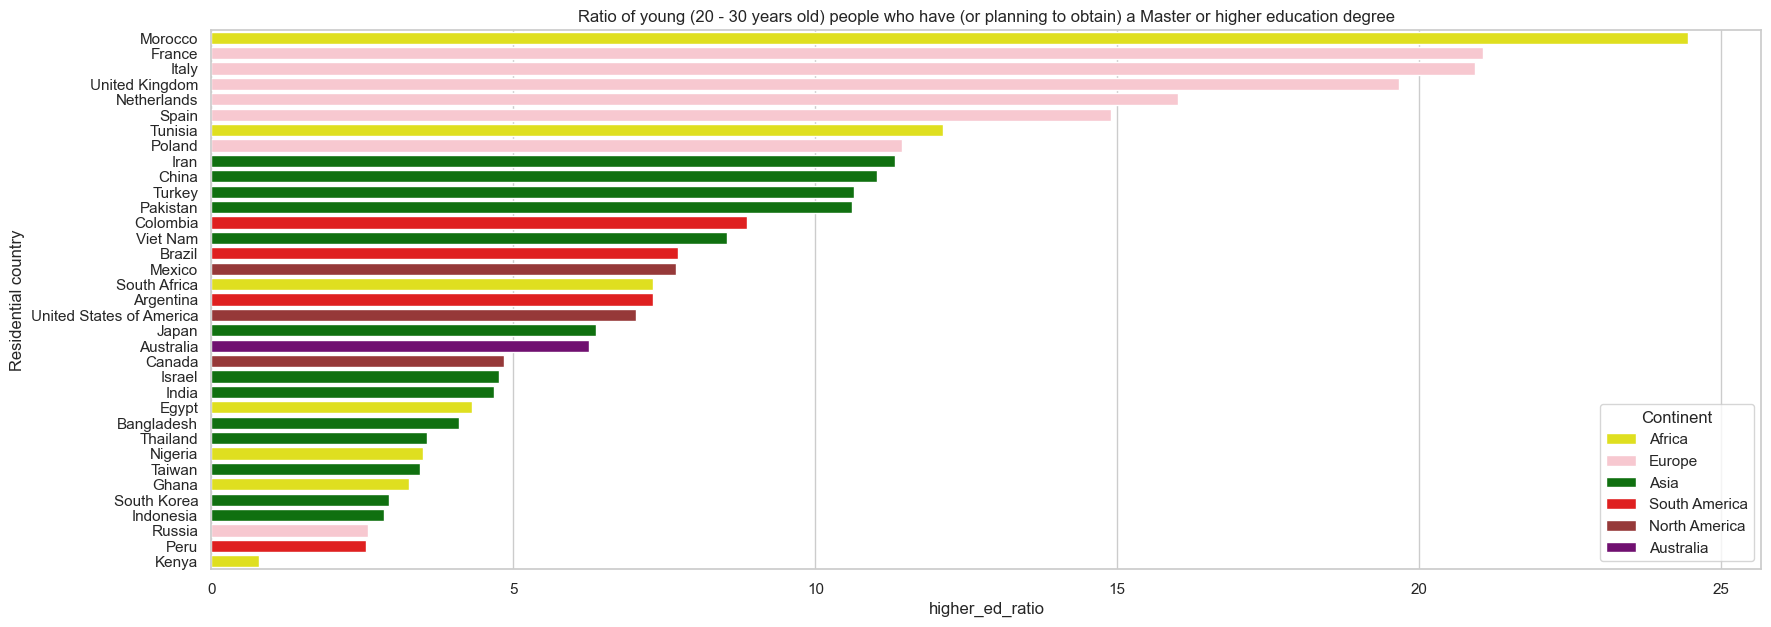

In [30]:
# Plot graph for ratio of young peole who have (or plan to  have) Master or higher education
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='higher_ed_ratio', y='Residential country', data=higher_education.sort_values(by='higher_ed_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of young (20 - 30 years old) people who have (or planning to obtain) a Master or higher education degree")

The forthteenth ratio describe the percentage of young young people (20 - 30 years old) who have or planning to obtain a Master or higher education. This is the first time an African country top our list. `Moroccans` seems to be planning a lot for the future. Similar with other graphs, Europe is claiming all the top spot, and followwing are Asian countries. The range of young people in countries who have a Master degree isn't very high with range of 25%, but there are some countries with significantly low score. 

The top 3 lowest score countries are `Kenya`, `Peru` and `Russia` (only about 2.5%). There is a certain trends that we see in our analysis, and one of those is that Russia countinuously score the lowest in Europe and sometimes compare to the rest of the world, which is very worrisome for this great empire.

Vietnam is on the upper middle of the graph, scoring at ~8% of young people who take the survey to have or planning to have a Master degree. 

## 4. Answering our questions
### 4.1 What countries/continent is leading in Data Science in the world?

I will use the ratios we calculated in our analysis to answer this question. To do that, I will use the ranking of the countries in the ratio to create a new metric to determine the strength of the country. The formula I've came up with is quite simple:

$\sum_{x}^n \frac{1}{x}$

With x is the rank of the corresponding countries and n is the number of ratio we are accessing. With this formula, the further away from the top the smaller the score of the country becomes. 

The list of ratio we are accessing:
- `big_com_ratio`: The ratio of peope work in large enterprise in that country
- `com_w10ds_ratio`: The ratio of people work in company with big Data Science team in that country
- `programming_exp_ratio`: The ratio of people who have more than 5 years of programming experience
- `ml_exp_ratio`: The ratio of people who have more than 5 years of ml experience
- `10k_ratio`: The ratio of people who earn more than 10,000 dollars/year

So the maximum score a country can score is 5.

In [31]:
# First, let's collect all of our ratios in one data frame
total_ratio = [big_company_df, company_w10ds_df, ppl_w5y_programming_exp, ppl_w5y_ml_exp, ppl_make_m10k]
total_ratio_df = reduce(lambda  left,right: pd.merge(left,right,on=['Residential country', 'Continent', 'number_of_response'], how='outer'), total_ratio)

# Get all ratio column
ratio_column_list = pd.Series([col if 'ratio' in col else None for col in total_ratio_df.columns]).dropna()

# Total ratio list
total_ratio_df.set_index(['Residential country', 'Continent'], inplace=True)

In [32]:
# Selected ratio
ds_strength_eval_ratio_list = [
    'big_com_ratio',
    'com_w10ds_ratio',
    'programming_exp_ratio',
    'ml_exp_ratio', 
    '10k_ratio', 
]

# Get ranking of countries
def country_ranking_index(x):
    res = x.rank(method='dense', ascending=False)
    return res

# Highest score is the number of ratios we're taking into accound
def country_growth_ranking_index(x):
    res = np.sum(1/x)
    return res

# Create dataframe for each countries with ranking in each of our strength evaluation list
country_growth_ranking_df = total_ratio_df.loc[:, ratio_column_list].apply(country_ranking_index, axis=0)

# Calculate strength for each countreis
country_growth_ranking_df['ds_strength_ratio'] = country_growth_ranking_df.loc[:, ds_strength_eval_ratio_list].apply(country_growth_ranking_index, axis=1)

# Reset index for plotting
country_growth_ranking_df.reset_index(inplace=True)

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Strength of Data Science fields in countries by ratio rank')

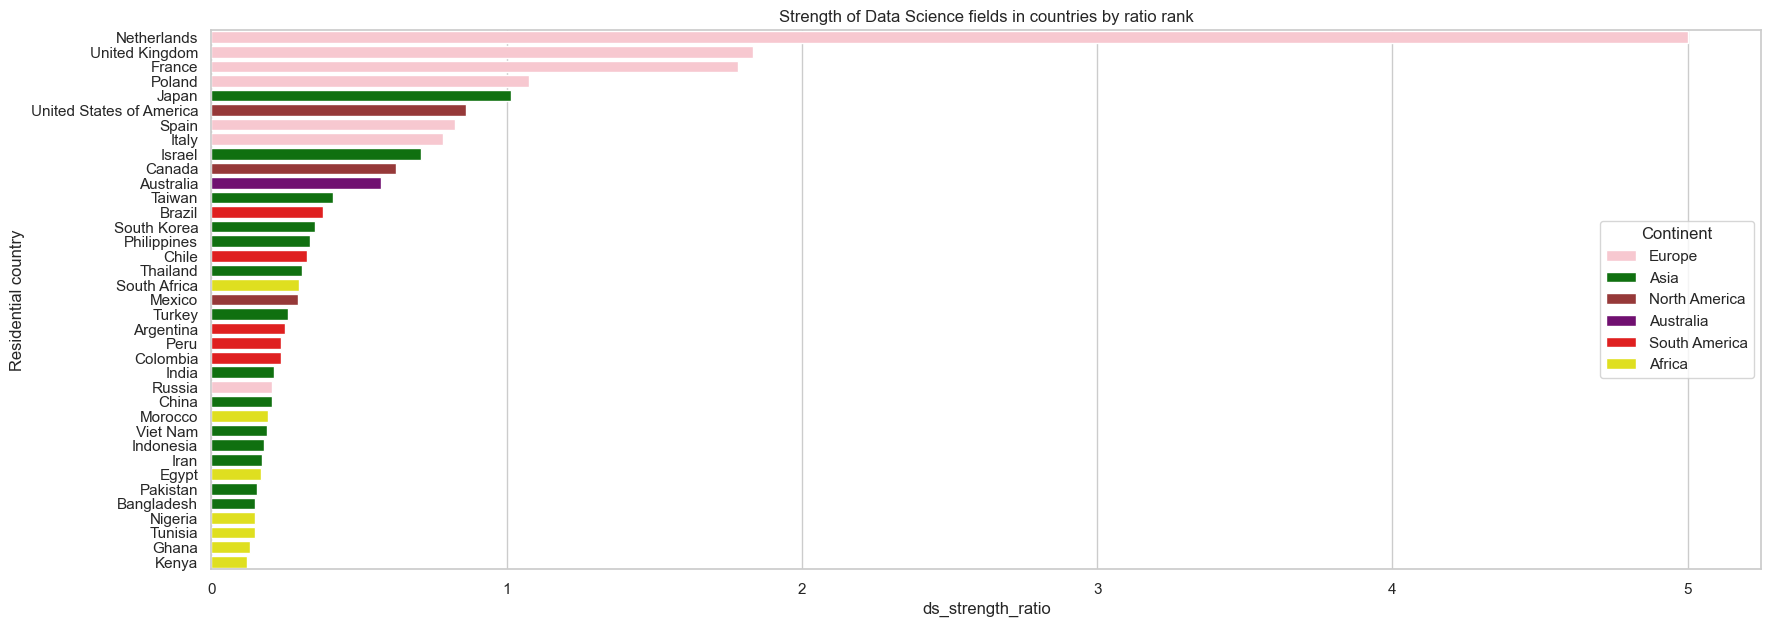

In [33]:
# Draw figure
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(data=country_growth_ranking_df.sort_values(by='ds_strength_ratio', ascending=False), x='ds_strength_ratio', y='Residential country',palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Strength of Data Science fields in countries by ratio rank")


Looking at the graph, we can easily determine that the Netherlands is the country leading in Data Science and related fileds, with the maximum score of 5 - meaning it tops at all 5 accounted ratio. Follwing behind are the UK, France, Poland and Japan (an Asian country) and the US.

We notice there is a clear separation between the developed and developing countries as the developed countries almost all sit on the top and developing countries at the bottom. Curiously, China is sitting at the bottom tile, which is quite contradictory to its current international superpower position. The same goes for Russia, which has consistently score quite low in almost all ratio.

While South American countries are consistenly score middle of the graph, it seems like African and Asian countries both have a long way to go to achive a better Data Science (and more broadly Data based decision making) foothold. 

Vietnam is ranked 10th from the bottom, and 3rd from the bottom if we're counting only Asian countries. Though it is acknowledged that Vietnam had made it to be accounted as a country with a big enough response pool to be included in analysis (which is to say there is a pool DS sprofessionals and related prefessions), there is a lot we can and must do to improve. Base on our analysis, one of that metric to use could be our experience with programming and machine learning technologies, as well as highten our education level.


### **4.2 What field to expect most growth in each continent**

In all continent, `Technology and Computer`, `Academic and Education` - and to a lesser extend - `Finance and Accounting` are the industries that are given most attention.

Other industries are given significantly less attention though are experience particular growth in some continents/countries.

Among some of the notible industries:
- `Medical and Pharmaceutical`: Notable attention in `Poland` (Europe) and `America` (North America).
- `Manufacturing and Fabrication`: Notable attention in `Japan` and `Taiwan` (Asia) and `Russia` (Europe).
- `Government and Social Serivice`: Notable attention in `Netherlands` (Europe), `Ghana` (Africa), `Argentina` (South America) and `Australia` (Oceana). 

### **4.3 What is the future Data Scientists and related demographic look like?**

This time, let's use the ratio we've gathered about demographic to answer our questions. We are looking for the demographic of young people who participated in the survey - people from 22-30 years old to see what they look like, and from that make prediction abou the people that will be leading in Data Science in the future. 

From the 12th ratio, we see that the tops countries with young people who complete the survey are from Asia, Africa and Europe. Let's dive a little deeper to see just how many young people coming from each continent are participating in this conversation.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Mean of young people (20 - 30 years old) ratio by continent')

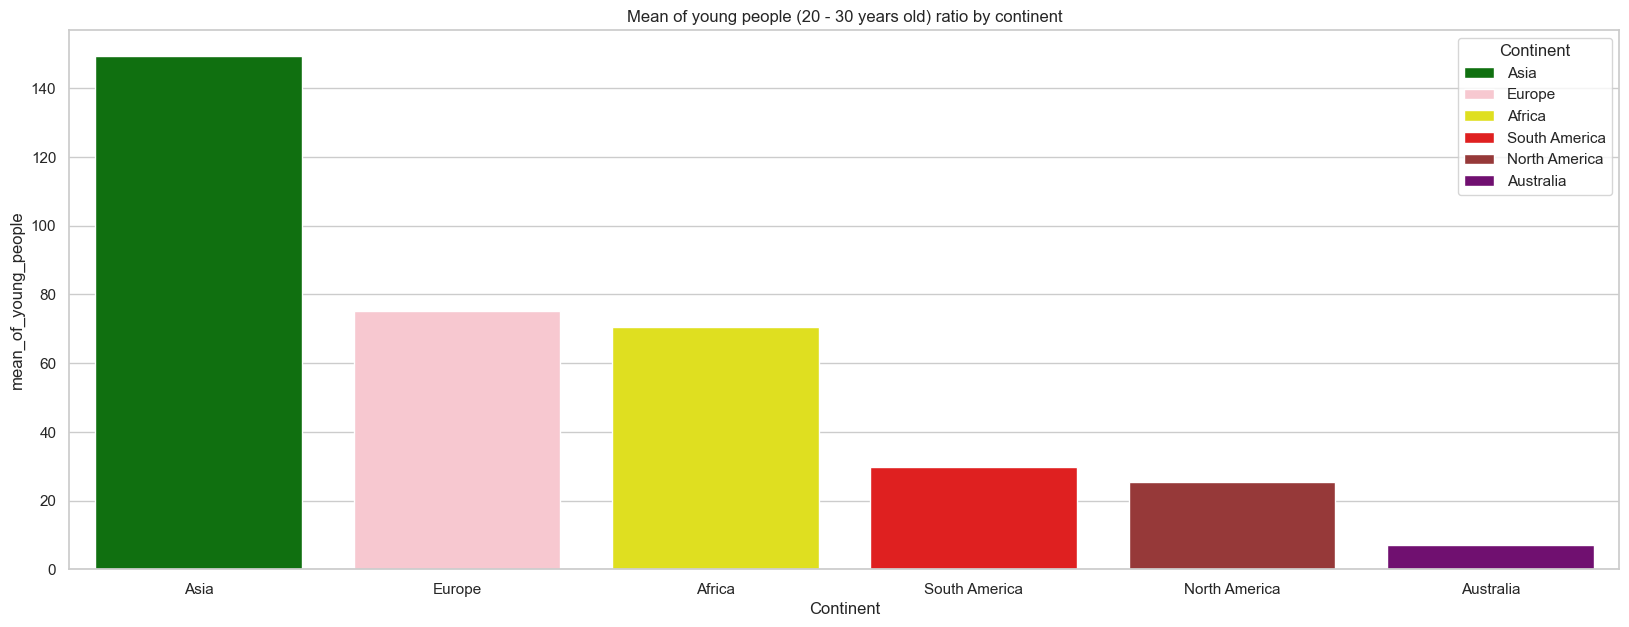

In [34]:
# Calculate young people by continent ratio
young_people_continent_ratio = young_people_distribution.groupby('Continent')['young_ppl_ratio'].agg(mean_of_young_people='sum')
young_people_continent_ratio.reset_index(inplace= True)

# Plot graph for young people by continent
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(y='mean_of_young_people', x='Continent', data=young_people_continent_ratio.sort_values(by='mean_of_young_people', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Mean of young people (20 - 30 years old) ratio by continent")

Looking at the graph, clear that there are a lot of young people from Asia. While scoring 2nd and 3rd place, Europe and Africa only accounted about half of Asia. There are less participation in South America, North America and the lowet are Australia.

Next, let's lookg at the male/female ratio. From the 13th ratio, you can see that most all of countries are male dominated. 

Let's take a wider look at the distribution of gender of young people in the continents.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

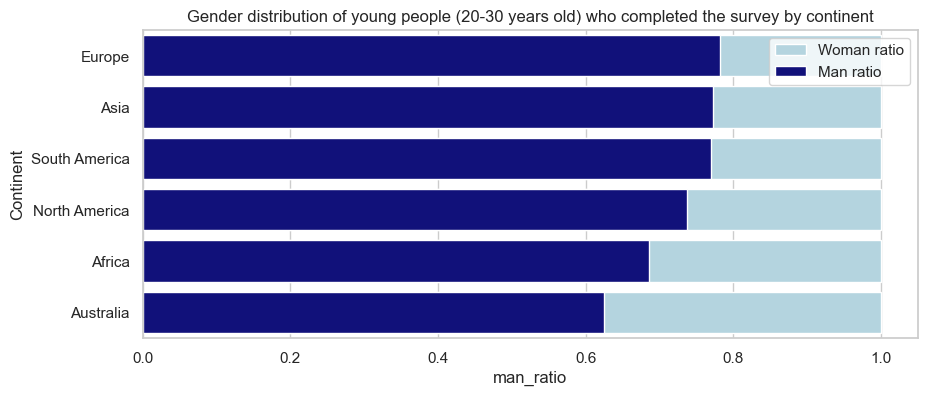

In [38]:
# Create copy of young people and gender distribtion for easy manipulation and clear variable name
young_people_and_gender_distribution = young_people.copy()

# Calculate young man for each countries
young_people_and_gender_ratio = young_people_and_gender_distribution[young_people_and_gender_distribution['Gender'] == 'Man'].groupby(['Residential country'])['Gender'].agg(man_count = 'count')

# Calculate number of young people for each countries
young_people_and_gender_ratio['total'] = young_people_and_gender_distribution.groupby(['Residential country'])['Gender'].agg('count')

# Calculate man ratio for each country
young_people_and_gender_ratio['man_ratio'] = young_people_and_gender_ratio['man_count'] / young_people_and_gender_ratio['total']

# Merge with total_response_df to get Continent of each countries
young_people_and_gender_ratio = pd.merge(young_people_and_gender_ratio, total_response_df, on='Residential country')

# Calculate mean of men ratio 
young_people_and_gender_ratio_continent = young_people_and_gender_ratio.groupby('Continent')['man_ratio'].agg(man_ratio = 'mean')

# Set woman ratio to 1 because th graph is behind the male graph -> show the difference between total and male graph 
# Which is the woman ratio
young_people_and_gender_ratio_continent['woman_ratio'] = 1

# Plot graph
plt.figure(figsize=(10,4))
young_people_and_gender_ratio_continent.reset_index(inplace=True)
bar2 = sns.barplot(x='woman_ratio', y='Continent', data=young_people_and_gender_ratio_continent, color='lightblue', label='Woman ratio')
bar1 = sns.barplot(x='man_ratio', y='Continent', data=young_people_and_gender_ratio_continent.sort_values(by='man_ratio', ascending=False), color='darkblue', label = 'Man ratio')
plt.title('Gender distribution of young people (20-30 years old) who completed the survey by continent')
plt.legend()
plt.show()

We see that in all continent, there are more man than woman in the field. The highest is Europe - at 80% man over 20% woman. This mean that even though Europe is one of if not the most Data Science matured continent, it is also the most discriminative. Lowest are Australia at about 60% man over 40% woman, while is better than the top countries, still are very much unbalanced.

we can see that the future of this field is going to be **male-dominated all over the world**.

Finally, looking back at the education trends of young people. The 14th ratio shows us that though most young people (by ratio) who holds or plan to holds a Master or higher degree are from Europe, there are leading countries who are from poorer continent like Africa and Asia catching up. 

To conclude the answers of this questions, here is a summary:
- Most of the young people who fill in the survey is from Asia. 
- The DS field is most likely going to be a male-dominated field.
- Europe still leads the world in terms of higher education but many countries from other continent is catching up.